In [1]:
import nbsetup
import numpy as np
import ergodicpy as ep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def analyse(o_range, trials=10, b_max=5, func=lambda o,x: np.random.random(o), threshold=0.07, ensembles=None):
    data = []
    fixed = []
    ecs = {}
    for o in o_range:
        nbsetup.cp(o)
        ecs[o] = []
        for t in range(trials):
            x = np.random.random(o)
            y = func(o, x)
            ec = ep.ErgodicCorrelation(x, y, lazy=True, ensembles=ensembles)
            ecs[o].append(ec)
            
            # then range
            for b in ep.binint(5, int(o/b_max)):
                ec.update_bins(b)
                ms = ec.correlations.copy()
                ms['o'] = o
                ms['t'] = t
                ms['b'] = b
                ms['e'] = ec.ensemble_count
                data.append(ms)
            
            # maxx is the final
            fixed.append(ms)
    
    df = pd.DataFrame(data=data)
    
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,5))
    pal = 'Spectral'
    key = 'complexity'

    # scatter
    g = sns.scatterplot(data=df, x='o', y=key, hue='b', ax=axes[0],  palette=pal)
    g.set(ylabel=None, xlabel=None, ylim=(0,None), title='Raw values')
        
    # strategies
    sns.lineplot(data=pd.DataFrame(data=fixed), x='o', y=key, ax=axes[1], label='max(bins)')
    g = sns.lineplot(data=df.groupby(['o','t']).min().reset_index(), x='o', y=key, ax=axes[1], label='min(complexity)')
    g = sns.lineplot(data=df.groupby(['o','t']).max().reset_index(), x='o', y=key, ax=axes[1], label='max(complexity)')
    g = sns.lineplot(data=df.groupby(['o','t']).mean().reset_index(), x='o', y=key, ax=axes[1], label='mean(complexity)')
    g.set(ylim=(0,None), title='Strategies', ylabel=None)
    axes[1].axhline(y=threshold, color='grey', linestyle='dotted')
        
    # ensembles
    g = sns.lineplot(data=df, x='o', y='e', ax=axes[2])
    g.set(title='Ensembles', ylabel=None)
    
    return df, ecs, fig

# Testing ensemble strategies

200


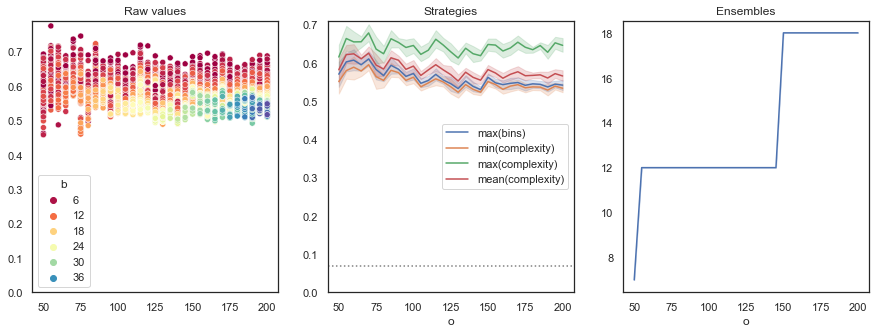

In [12]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.1,o), ensembles=True)

200


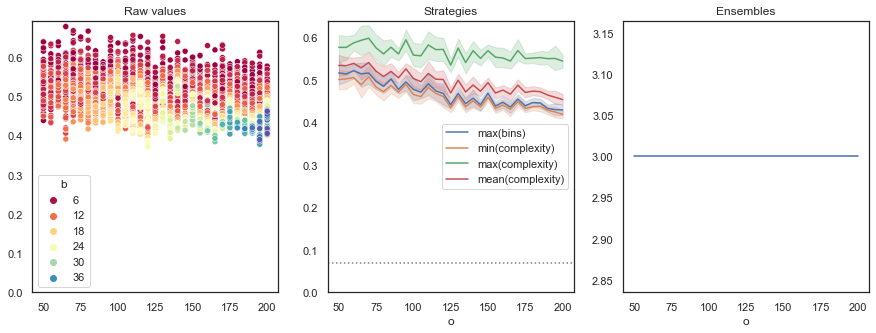

In [11]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.1,o), ensembles=3)

200


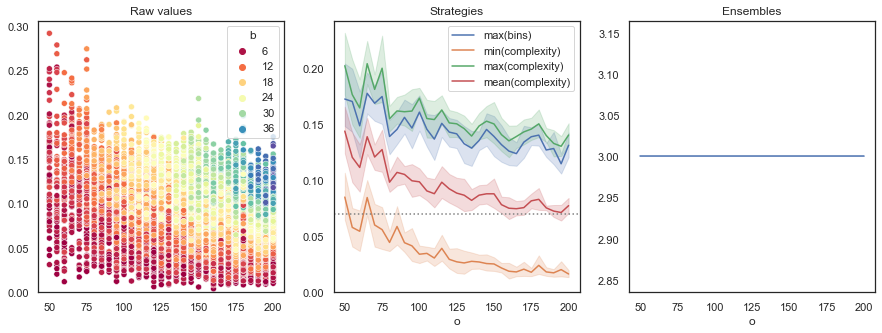

In [13]:
b = analyse(ep.binint(50,200,30), ensembles=3)

200


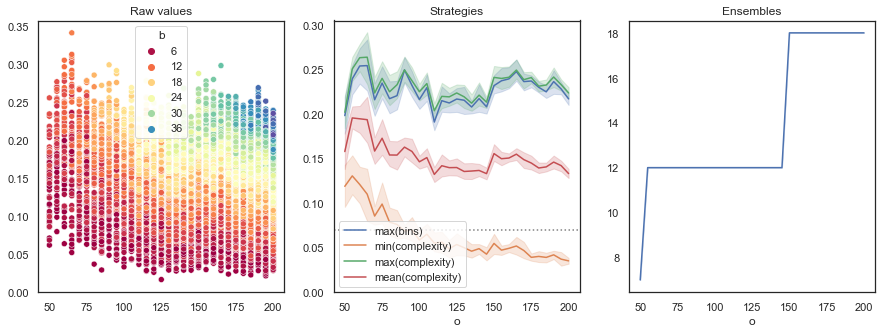

In [14]:
b = analyse(ep.binint(50,200,30), ensembles=True)

# Testing low vs high for small numbers

200


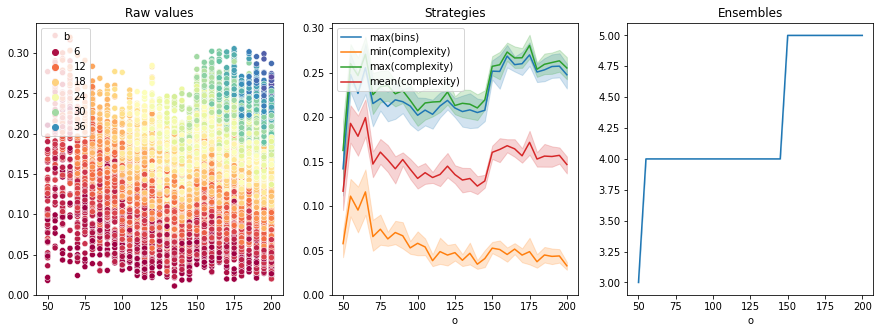

In [26]:
b = analyse(ep.binint(50,200,30))

200


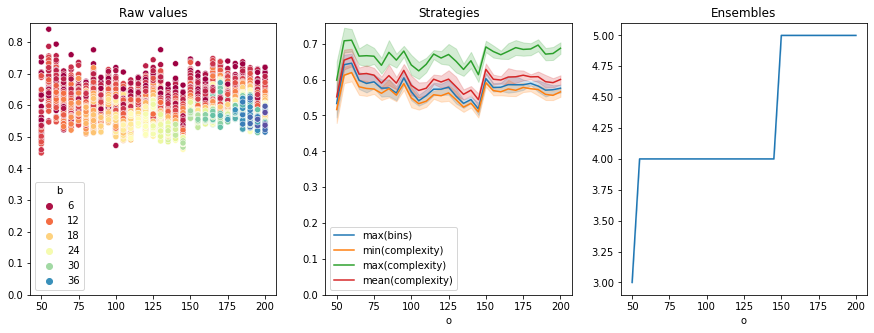

In [27]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.1,o))

# Testing for larger numbers of observations

2000


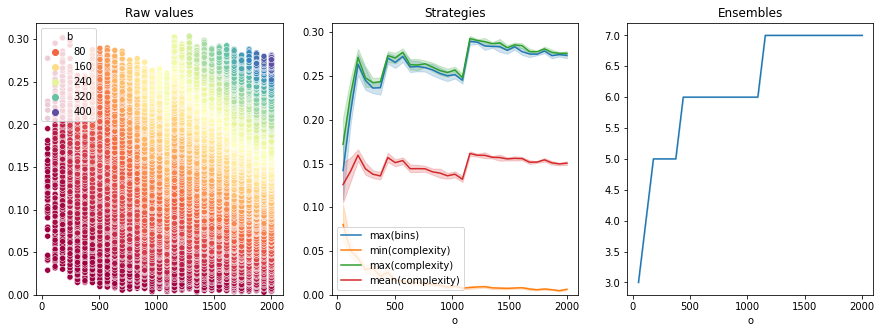

In [28]:
b = analyse(ep.binint(50,2000,30))

2000


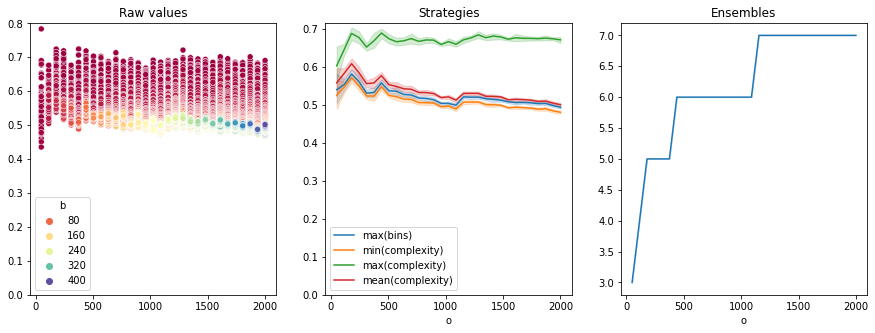

In [29]:
b = analyse(ep.binint(50,2000,30), func=lambda o,x: x+np.random.normal(0,0.1,o))

# Testing for more noise

200


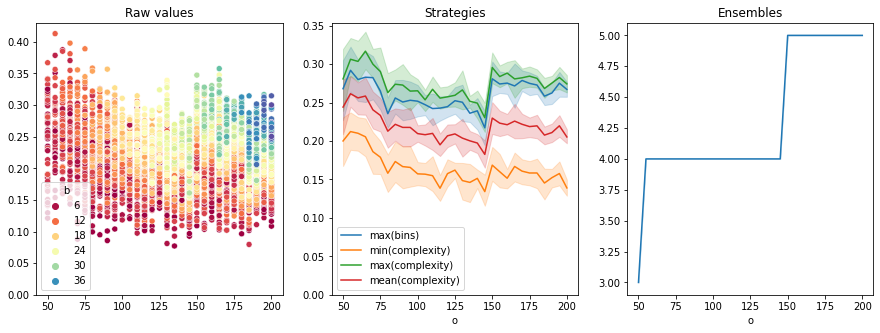

In [30]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,0.5,o))

200


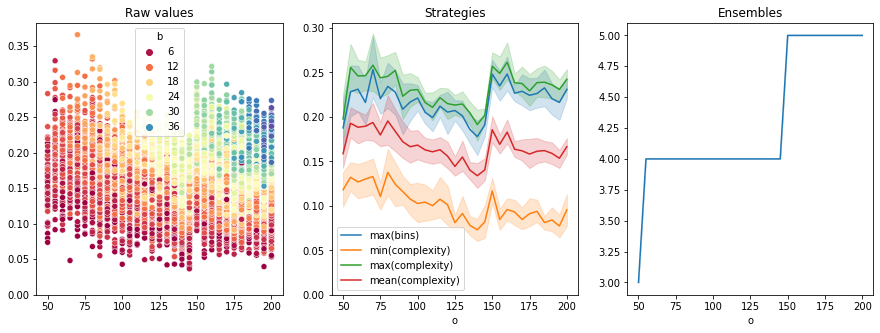

In [33]:
b = analyse(ep.binint(50,200,30), func=lambda o,x: x+np.random.normal(0,1.2,o))